In [87]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import random
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

import warnings
warnings.filterwarnings('ignore')

In [40]:
train_path = r"C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\train"
data_set_path = r"C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI"
test_path = r"C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\test"

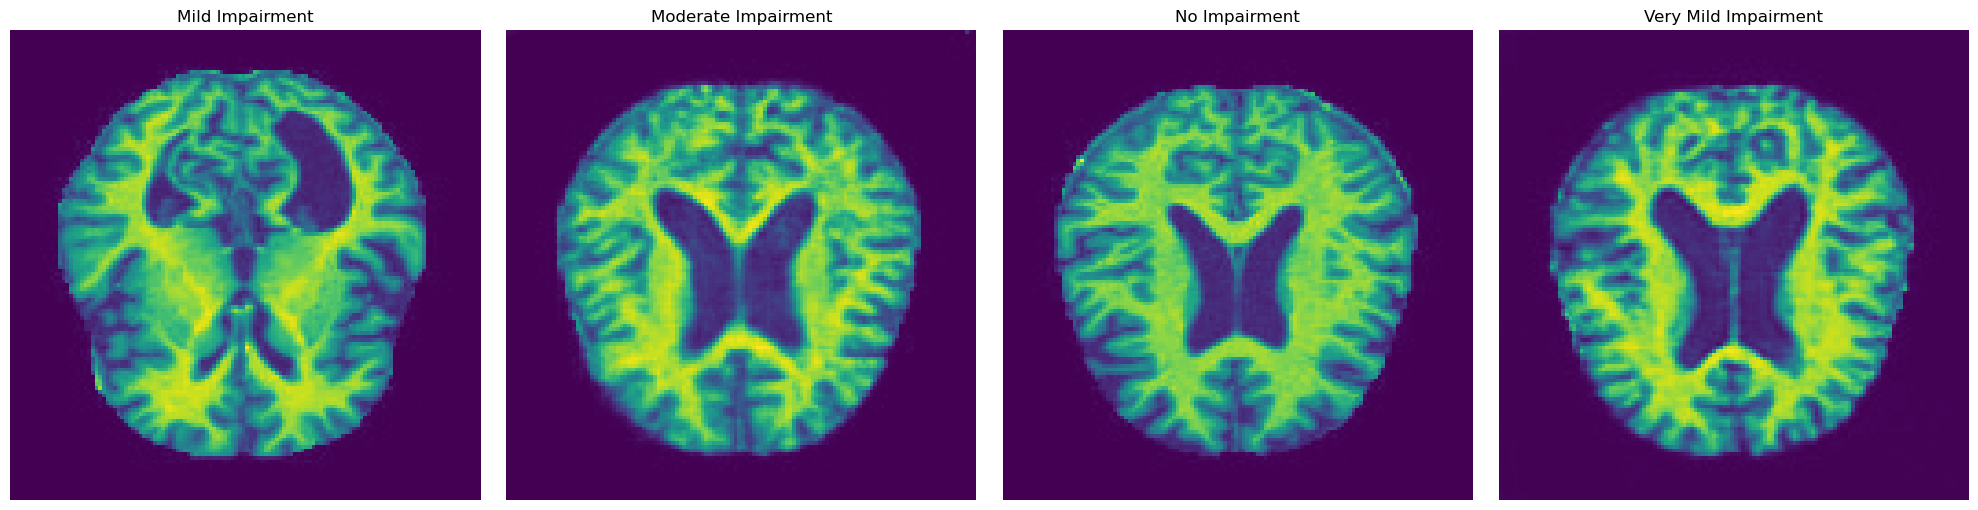

In [41]:
label_names = os.listdir(train_path)

fig, axes = plt.subplots(1, len(label_names), figsize=(20, 5))

for i, class_name in enumerate(label_names):
    class_folder = os.path.join(train_path, class_name)
    image_name = random.choice(os.listdir(class_folder))
    image_path = os.path.join(class_folder, image_name)

    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [62]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 25

train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [63]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_set_path, 'train'),
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 8685 images belonging to 4 classes.


In [64]:
test_generator = test_datagen.flow_from_directory(
    os.path.join(data_set_path, 'test'),
    target_size = IMG_SIZE, 
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = False
)

Found 1275 images belonging to 4 classes.


In [65]:
class_indices = train_generator.class_indices
print(class_indices)

CLASS_NAMES = list(class_indices.keys())
print(CLASS_NAMES)

{'Mild Impairment': 0, 'Moderate Impairment': 1, 'No Impairment': 2, 'Very Mild Impairment': 3}
['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']


In [66]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [67]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
num_classes = train_generator.num_classes

predictions = Dense(num_classes, activation="softmax")(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [68]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [69]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [70]:
history = model.fit(
    train_generator, 
    validation_data = test_generator,
    epochs = EPOCHS
)

Epoch 1/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 2368s 4s/step - accuracy: 0.4564 - loss: 1.1920 - val_accuracy: 0.4682 - val_loss: 1.1594
Epoch 2/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 10851s 20s/step - accuracy: 0.6167 - loss: 0.8893 - val_accuracy: 0.5522 - val_loss: 0.9399
Epoch 3/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 2993s 6s/step - accuracy: 0.6669 - loss: 0.7719 - val_accuracy: 0.5561 - val_loss: 0.8801
Epoch 4/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 2021s 4s/step - accuracy: 0.6919 - loss: 0.7033 - val_accuracy: 0.5733 - val_loss: 0.8819
Epoch 5/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 2062s 4s/step - accuracy: 0.7103 - loss: 0.6584 - val_accuracy: 0.5788 - val_loss: 0.8817
Epoch 6/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 1887s 3s/step - accuracy: 0.7219 - loss: 0.6340 - val_accuracy: 0.5843 - val_loss: 0.8408
Epoch 7/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 1833s 3s/step - accuracy: 0.7246 - loss: 0.6146 - val_accuracy: 0.5639 - val_loss: 0.8488
Epoch 8/25
543/543 ━━━━━━━━━━━━━━━━━━━━ 1808s 3s/step - accuracy: 0.7326 - loss: 0.5965 

In [82]:
model.save(r'C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\vg16alzemiers.h5')

In [91]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [93]:
def predict_alzemiers(image_path, model, class_labels, img_size=(224, 224)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)   # <-- FIX HERE
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()
    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


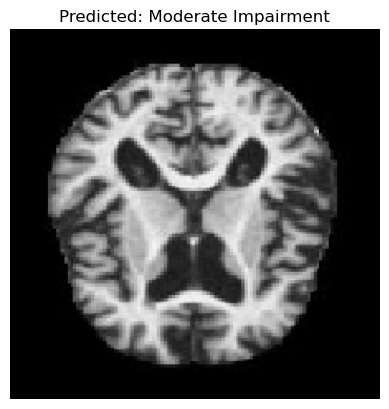

Moderate Impairment


In [97]:
model = model = load_model(r'C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\vg16alzemiers.h5')
img_path = r"C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\test\Moderate Impairment\13 (2).jpg"
result = predict_alzemiers(img_path, model, CLASS_NAMES)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


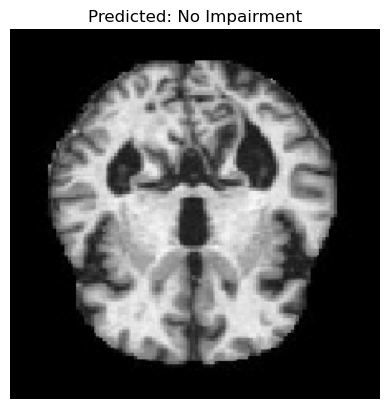

No Impairment


In [104]:
img_path = r"C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\train\No Impairment\NoImpairment (39).jpg"
result = predict_alzemiers(img_path, model, CLASS_NAMES)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


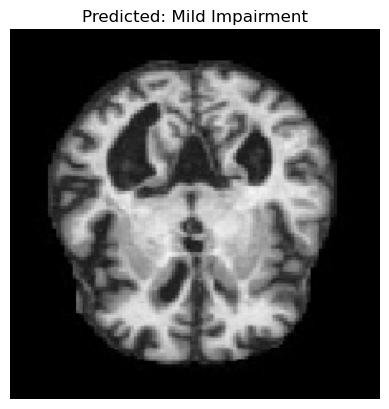

Mild Impairment


In [106]:
img_path = r"C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\train\Mild Impairment\MildImpairment (68).jpg"
result = predict_alzemiers(img_path, model, CLASS_NAMES)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


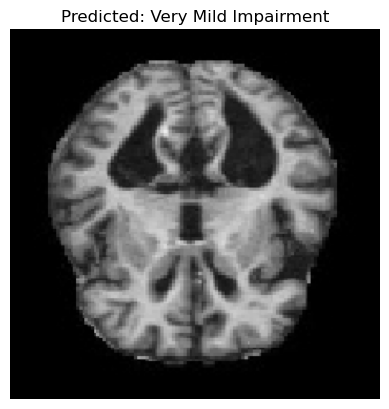

Very Mild Impairment


In [107]:
img_path = r"C:\Users\Vijay_k943wj6\Desktop\datascience\CNN\Alzheimer MRI\Alzheimer MRI\train\Very Mild Impairment\VeryMildImpairment (25).jpg"
result = predict_alzemiers(img_path, model, CLASS_NAMES)
print(result)